<a href="https://colab.research.google.com/github/Befezdow/ai_test/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



In [3]:
drive.mount('/content/gdrive')
!ls '/content/gdrive/My Drive/ML/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
AWESOME_DATA.csv  preview.csv


Загружаем данные из csv:

In [4]:
names_array = ['gender', 'age', 'class1', 'class2', 'class3', *['t{}'.format(i + 1) for i in range(60000)]]
url = '/content/gdrive/My Drive/ML/AWESOME_DATA.csv'
data = pd.read_csv(url, names=names_array)
data

,gender,age,class1,class2,class3,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,Female,85.0,3,NaN,NaN,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,...,-0.026842,-0.028914,-0.028548,-0.029272,-0.031896,-0.036031,-0.039794,-0.033593,-0.028113,-0.031301,-0.041995,-0.045999,-0.043968,-0.039291,-0.030942,-0.031698,-0.030754,-0.033479,-0.033446,-0.036413,-0.038551,-0.035920,-0.036477,-0.036518,-0.041184,-0.039042,-0.033992,-0.033940,-0.031528,-0.026267,-0.028246,-0.028318,-0.025569,-0.021279,-0.018593,-0.032023,-0.046202,-0.042003,-0.034466,-0.039000
1,Male,79.0,9,NaN,NaN,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,...,-0.934049,-0.949376,-0.962051,-0.963686,-0.961742,-0.952030,-0.939060,-0.934415,-0.936366,-0.939326,-0.932011,-0.926725,-0.928331,-0.929013,-0.921389,-0.906309,-0.900787,-0.901273,-0.895911,-0.893740,-0.891627,-0.885869,-0.881577,-0.873489,-0.866113,-0.865862,-0.859139,-0.852907,-0.843380,-0.833925,-0.833698,-0.836701,-0.827418,-0.827810,-0.816231,-0.819793,-0.797862,-0.819597,-0.771195,-0.845490
2,Male,66.0,3,NaN,NaN,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,...,-0.051053,-0.052053,-0.051053,-0.049053,-0.047053,-0.044053,-0.040053,-0.037053,-0.036053,-0.034053,-0.034053,-0.034053,-0.033053,-0.031053,-0.028053,-0.025053,-0.022053,-0.019053,-0.017053,-0.017053,-0.016053,-0.016053,-0.014053,-0.013053,-0.010053,-0.007053,-0.003053,0.001947,0.004947,0.007947,0.009947,0.011947,0.012947,0.015947,0.018947,0.023947,0.027947,0.030947,0.034947,0.037947
3,Male,93.0,2,NaN,NaN,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,...,-0.117502,-0.208445,-0.254530,-0.270954,-0.254278,-0.223832,-0.205055,-0.179093,-0.157585,-0.127692,-0.089728,-0.074150,-0.056856,-0.038932,-0.024184,-0.016817,-0.014031,-0.011765,-0.022771,-0.023586,-0.013769,-0.004949,-0.003625,-0.013567,-0.019471,-0.015372,-0.021787,-0.028885,-0.028997,-0.021737,-0.013160,-0.006182,-0.003825,-0.002177,-0.001466,-0.006676,-0.011236,-0.016540,-0.016289,-0.022542
4,Male,65.0,2,NaN,NaN,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,...,1.016910,0.710028,0.406775,0.104651,-0.181270,-0.432753,-0.645005,-0.816434,-0.952654,-1.038151,-1.073172,-1.060904,-1.006902,-0.914312,-0.803

In [5]:
data = data.drop('class2', axis = 1)
data = data.drop('class3', axis = 1)
data

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,Female,85.0,3,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,-0.068795,-0.070163,...,-0.026842,-0.028914,-0.028548,-0.029272,-0.031896,-0.036031,-0.039794,-0.033593,-0.028113,-0.031301,-0.041995,-0.045999,-0.043968,-0.039291,-0.030942,-0.031698,-0.030754,-0.033479,-0.033446,-0.036413,-0.038551,-0.035920,-0.036477,-0.036518,-0.041184,-0.039042,-0.033992,-0.033940,-0.031528,-0.026267,-0.028246,-0.028318,-0.025569,-0.021279,-0.018593,-0.032023,-0.046202,-0.042003,-0.034466,-0.039000
1,Male,79.0,9,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,-0.021534,-0.024676,...,-0.934049,-0.949376,-0.962051,-0.963686,-0.961742,-0.952030,-0.939060,-0.934415,-0.936366,-0.939326,-0.932011,-0.926725,-0.928331,-0.929013,-0.921389,-0.906309,-0.900787,-0.901273,-0.895911,-0.893740,-0.891627,-0.885869,-0.881577,-0.873489,-0.866113,-0.865862,-0.859139,-0.852907,-0.843380,-0.833925,-0.833698,-0.836701,-0.827418,-0.827810,-0.816231,-0.819793,-0.797862,-0.819597,-0.771195,-0.845490
2,Male,66.0,3,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,0.008492,0.008492,...,-0.051053,-0.052053,-0.051053,-0.049053,-0.047053,-0.044053,-0.040053,-0.037053,-0.036053,-0.034053,-0.034053,-0.034053,-0.033053,-0.031053,-0.028053,-0.025053,-0.022053,-0.019053,-0.017053,-0.017053,-0.016053,-0.016053,-0.014053,-0.013053,-0.010053,-0.007053,-0.003053,0.001947,0.004947,0.007947,0.009947,0.011947,0.012947,0.015947,0.018947,0.023947,0.027947,0.030947,0.034947,0.037947
3,Male,93.0,2,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,0.059849,0.036704,...,-0.117502,-0.208445,-0.254530,-0.270954,-0.254278,-0.223832,-0.205055,-0.179093,-0.157585,-0.127692,-0.089728,-0.074150,-0.056856,-0.038932,-0.024184,-0.016817,-0.014031,-0.011765,-0.022771,-0.023586,-0.013769,-0.004949,-0.003625,-0.013567,-0.019471,-0.015372,-0.021787,-0.028885,-0.028997,-0.021737,-0.013160,-0.006182,-0.003825,-0.002177,-0.001466,-0.006676,-0.011236,-0.016540,-0.016289,-0.022542
4,Male,65.0,2,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,0.004789,-0.007276,...,1.016910,0.710028,0.406775,0.104651,-0.181270,-0.432753,-0.645005,-0.816434,-0.952654,-1.0381

In [6]:
data['class1'].unique()

array([3, 9, 2, 5, 1, 7, 6, 4, 8])

In [7]:
data.describe(include = 'all')

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
count,2416,2415.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,...,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,65.611180,3.995447,0.000322,-0.000917,-0.001243,-0.001459,-0.001480,-0.001232,-0.001018,-0.001288,-0.001975,-0.002260,-0.001814,-0.001125,-0.000640,-0.000494,-0.000343,-0.000203,0.000203,-0.000030,-0.000584,-0.000660,-0.000675,-0.000777,-0.001010,-0.001342,-0.001229,-0.000844,-0.000851,-0.000977,-0.001005,-0.000370,-0.000106,-0.000341,-0.000345,-0.000332,-0.000629,-0.000532,-0.000255,...,0.009173,0.008774,0.008774,0.008733,0.009790,0.011463,0.011250,0.011731,0.013364,0.014685,0.014093,0.013512,0.012165,0.009729,0.008113,0.006907,0.003839,0.001527,0.000972,0.000868,-0.000637,-0.000975,-0.000866,-0.000977,-0.000114,0.001451,0.001458,0.001965,0.003465,0.004902,0.004489,0.004320,0.003995,0.002774,0.002194,0.002136,-0.000018,-0.001932,-0.001806,-0.001513
std,NaN,16.748665,2.211297,0.118246,0.151365,0.138903,0.144731,0.143418,0.148790,0.151067,0.148154,0.142049,0.141160,0.144961,0.149425,0.150181,0.148836,0.146548,0.144654,0.144146,0.142550,0.138538,0.137037,0.138402,0.138688,0.137455,0.135682,0.133891,0.132952,0.132799,0.132857,0.131877,0.131479,0.132687,0.133409,0.134046,0.135302,0.137002,0.138827,0.140674,...,0.373250,0.365588,0.359659,0.355271,0.355230,0.360811,0.364799,0.373524,0.382054,0.390454,0.391852,0.387165,0.380694,0.372910,0.367938,0.366473,0.363179,0.364748,0.365480,0.366916,0.364014,0.358251,0.353724,0.349825,0.349796,0.353546,0.356226,0.365387,0.376170,0.386278,0.387098,0.381475,0.374782,0.368415,0.361034,0.360351,0.351515,0.361218,0.353337,0.380581
min,NaN,-1.000000,1.000000,-1.016408,-1.434000,-1.275380,-1.341125,-1.282850,-1.300322,-1.297810,-1.333237,-1.3284

In [8]:
data['age'].unique()

array([85., 79., 66., 93., 65., 55., 82., 87., 51., 61., 90., 77., 70.,
       60., 62., 59., 84., 71., 45., 48., 75., 49., 72., 78., 86., 46.,
       94., 33., 74., 64., 67., 63., 88., 32., 92., 68., 76., 54., 89.,
       31., 80., 30., 57., 83., 34., 27., 73., 69., 52., 44., 43., 47.,
       39., 56., 81., 53., 50., 16., 29., 37., 58., 24., 22., 40., 41.,
       11., 26., 28., 96., 35., 91., 25., 36., 23., 19., 17., 42., 18.,
       15.,  8., 20., 38., 14., 21., 98., -1., 95.,  5., nan, 12.])

Заполняем пустые значения медианой соостветсвующего столбца:

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [10]:
data['age'].unique()

array([85., 79., 66., 93., 65., 55., 82., 87., 51., 61., 90., 77., 70.,
       60., 62., 59., 84., 71., 45., 48., 75., 49., 72., 78., 86., 46.,
       94., 33., 74., 64., 67., 63., 88., 32., 92., 68., 76., 54., 89.,
       31., 80., 30., 57., 83., 34., 27., 73., 69., 52., 44., 43., 47.,
       39., 56., 81., 53., 50., 16., 29., 37., 58., 24., 22., 40., 41.,
       11., 26., 28., 96., 35., 91., 25., 36., 23., 19., 17., 42., 18.,
       15.,  8., 20., 38., 14., 21., 98., -1., 95.,  5., 12.])

In [0]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object' and c != 'class1']

Векторизируем колонку gender:

In [12]:
data.at[data['gender'] == 'Male', 'gender'] = 0
data.at[data['gender'] == 'Female', 'gender'] = 1
data['gender'].describe()

count    2416.000000
mean        0.397351
std         0.489451
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Нормализуем числовые атрибуты:


In [0]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data[numerical_columns] = data_numerical

In [14]:
data

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,1,1.157810,3,0.024689,0.086208,0.171920,0.085761,-0.163233,-0.211840,-0.201328,-0.280803,-0.328649,-0.252866,-0.172474,-0.107690,-0.094385,-0.160418,-0.188398,-0.255109,-0.325126,-0.369067,-0.391230,-0.390542,-0.246972,-0.165466,-0.260000,-0.224787,-0.154484,-0.281966,-0.335631,-0.327567,-0.315027,-0.292079,-0.323945,-0.410590,-0.460735,-0.458001,-0.452591,-0.491715,-0.496951,...,-0.096490,-0.103087,-0.103772,-0.106974,-0.117351,-0.131632,-0.139922,-0.121344,-0.108563,-0.117778,-0.143135,-0.153708,-0.147449,-0.131454,-0.106148,-0.105341,-0.095251,-0.095974,-0.094174,-0.101606,-0.104156,-0.097544,-0.100675,-0.101596,-0.117409,-0.114534,-0.099514,-0.098266,-0.093025,-0.080690,-0.084564,-0.085559,-0.078885,-0.065288,-0.057576,-0.094794,-0.131387,-0.110932,-0.092431,-0.098499
1,0,0.799499,9,0.099217,0.118480,0.123785,0.154767,0.156466,0.150478,0.146088,0.150856,0.162596,0.166748,0.195551,0.183101,0.111043,0.093123,0.092570,0.059168,0.037131,0.055899,0.066243,0.066096,0.066635,0.065949,0.070472,0.055848,0.014041,-0.007619,-0.006486,-0.045685,-0.060657,-0.088566,-0.144327,-0.140071,-0.143030,-0.137377,-0.142325,-0.151284,-0.173600,...,-2.527052,-2.620844,-2.699293,-2.737119,-2.734941,-2.670352,-2.605024,-2.533027,-2.485855,-2.443343,-2.414443,-2.428517,-2.470480,-2.517340,-2.526252,-2.491905,-2.490854,-2.475133,-2.453983,-2.438178,-2.447681,-2.470040,-2.489830,-2.494141,-2.475720,-2.453185,-2.415872,-2.339632,-2.251230,-2.171564,-2.165306,-2.204657,-2.218392,-2.254480,-2.266893,-2.280915,-2.269731,-2.263630,-2.177489,-2.217601
2,0,0.023161,3,-0.083133,-0.050149,-0.059499,-0.048702,-0.042028,-0.035459,-0.036338,-0.035233,-0.024871,-0.030089,-0.025482,-0.022642,-0.019098,-0.026966,-0.028416,-0.029762,-0.039621,-0.031409,-0.021104,-0.028080,-0.020467,-0.012476,0.003650,-0.001221,0.005384,0.002527,-0.004948,-0.003992,-0.003814,-0.001051,0.004507,0.021235,0.043547,0.050434,0.059276,0.065004,0.062181,...,-0.161356,-0.166381,-0.166345,-0.162654,-0.160018,-0.153865,-0.140633,-0.130606,-0.129347,-0.124825,-0.122867,-0.122854,-0.118779,-0.109362,-0.098295,-0.087209,-0.071293,-0.056423,-0.049319,-0.048841,-0.042350,-0.042087,-0.037281,-0.034520,-0.028412,-0.024055,-0.012663,-0.000049,0.003939,0.007884,0.014101,0.019992,0.023885,0.035755,0.046402,0.060527,0.079554,0.091023,0.104018,0.103684
3,0,1.635557,2,-0.021931,0.033652,-0.006001,-0.030513,-0.022346,-0.046276,-0.123807,-0.235546,-0.250908,-0.163376,-0.147521,-0.231687,-0.285284,-0.201394,-0.151944,-0.071462,0.031920,0.142879,0.218367,0.131657,0.039102,0.025473,0.109742,0.125432,0.024291,-0.012789,0.006920,0.009400,0.095990,0.176264,0.216579,0.226183,0.230735,0.263551,0.380389,0.434941,0.262729,...,-0.339382,-0.594162,-0.732094,-0.787251,-0.743373,-0.652128,-0.592942,-0.510875,-0.447449,-0.364647,-0.264948,-0.226419,-0.181304,-0.130489,-0.087778,-0.064736,-0.049205,-0.036441,-0.064965,-0.066647,-0.036076,-0.011093,-0.007801,-0.035990,-0.055337,-0.047584,-0.065254,-0.084431,-0.086296,-0.068964,-0.045591,-0.027531,-0.020866,-0.013440,-0.010137,-0.024454,-0.031914,-0.040442,-0.040987,-0.055254
4,0,-0.036558,2,-0.261505,-0.175127,-0.091284,-0.153966,-0.161013,-0.234197,-0.223224,-0.083577,-0.053479,-0.142959,-0.215368,-0.211064,-0.116799,-0.113030,-0.206299,-0.225545,-0.072899,0.037303,0.052547,-0.012351,-0.035288,-0.033050,-0.052701,0.025924,0.065426,0.026371,0.009234,-0.050575,-0.121115,-0.072443,-0.002130,-0.088346,-0.055910,-0.015807,-0.033606,0.038329,-0.049907,...,2.699897,1.918152,1.106606,0.269985,-0.537849,-1.231160,-1.798950,-2.217167,-2.528486,-2.69

Бьем данные на входы и выходы:

In [0]:
x = data.drop('class1', axis = 1) # TODO replace gender with class
y = data['class1']

Применяем PCA с 2 компонентами и выводим значения получившихся компонент:

In [16]:
from sklearn import decomposition

components_count = 2
pca = decomposition.PCA(n_components=components_count)
principal_components = pca.fit_transform(x)
principal_x = pd.DataFrame(
    data = principal_components, 
    columns = ['pc{}'.format(i + 1) for i in range(components_count)]
)
principal_x

,pc1,pc2
0,-4.470898,0.288442
1,-7.204910,0.171749
2,-2.629466,1.740393
3,-0.710821,-1.404744
4,1.365882,-2.783713
...,...,...
2411,1.693799,2.570669
2412,-1.786402,-0.442534
2413,9.816193,-2.733784
2414,9.489719,-1.209167


Выведем получившиеся данные:

In [17]:
new_data = principal_x
new_data['class1'] = y
new_data

,pc1,pc2,class1
0,-4.470898,0.288442,3
1,-7.204910,0.171749,9
2,-2.629466,1.740393,3
3,-0.710821,-1.404744,2
4,1.365882,-2.783713,2
...,...,...,...
2411,1.693799,2.570669,1
2412,-1.786402,-0.442534,5
2413,9.816193,-2.733784,7
2414,9.489719,-1.209167,6


Отрисуем точки двумерного пространства:

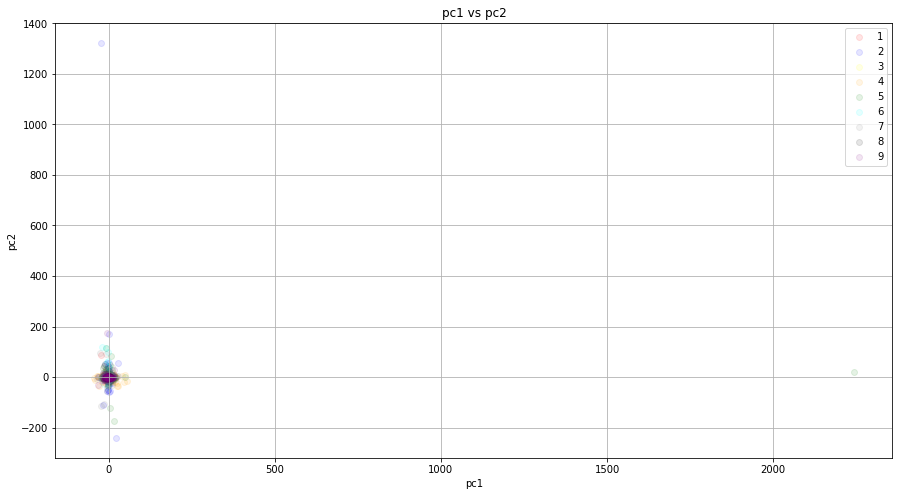

In [18]:
plt.figure(figsize = (15, 8))

plt.scatter(
    new_data[new_data['class1'] == 1]['pc1'],
    new_data[new_data['class1'] == 1]['pc2'],
    alpha = 0.1,
    label = '1',
    color = 'red'
)

plt.scatter(
    new_data[new_data['class1'] == 2]['pc1'],
    new_data[new_data['class1'] == 2]['pc2'],
    alpha = 0.1,
    label = '2',
    color = 'blue'
)

plt.scatter(
    new_data[new_data['class1'] == 3]['pc1'],
    new_data[new_data['class1'] == 3]['pc2'],
    alpha = 0.1,
    label = '3',
    color = 'yellow'
)

plt.scatter(
    new_data[new_data['class1'] == 4]['pc1'],
    new_data[new_data['class1'] == 4]['pc2'],
    alpha = 0.1,
    label = '4',
    color = 'orange'
)

plt.scatter(
    new_data[new_data['class1'] == 5]['pc1'],
    new_data[new_data['class1'] == 5]['pc2'],
    alpha = 0.1,
    label = '5',
    color = 'green'
)

plt.scatter(
    new_data[new_data['class1'] == 6]['pc1'],
    new_data[new_data['class1'] == 6]['pc2'],
    alpha = 0.1,
    label = '6',
    color = 'cyan'
)

plt.scatter(
    new_data[new_data['class1'] == 7]['pc1'],
    new_data[new_data['class1'] == 7]['pc2'],
    alpha = 0.1,
    label = '7',
    color = 'gray'
)

plt.scatter(
    new_data[new_data['class1'] == 8]['pc1'],
    new_data[new_data['class1'] == 8]['pc2'],
    alpha = 0.1,
    label = '8',
    color = 'black'
)

plt.scatter(
    new_data[new_data['class1'] == 9]['pc1'],
    new_data[new_data['class1'] == 9]['pc2'],
    alpha = 0.1,
    label = '9',
    color = 'purple'
)

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pc1 vs pc2')
plt.legend()
plt.grid()

Разобьем данные на обучающую и тестовую выборки для обучения алгоритма:

In [19]:
from sklearn.model_selection import train_test_split

new_x = data.drop('class1', axis = 1)
new_y = data['class1']

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state = 42)

n_train, _ = x_train.shape 
n_test,  _ = x_test.shape 

print(n_train, n_test)

1691 725


Определим наиболее подходящее кол-во соседей:

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

KeyboardInterrupt: ignored

Применим метод 25 ближайших соседей и выведем ошибку на тестовых данных:

In [23]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.7241379310344828

Посчитаем ошибки для разного количества компонент и нарисуем график зависимости ошибки:

In [1]:
max_components_count = 50
test_errors = []
for components_count in range(1, max_components_count + 1):
  pca = decomposition.PCA(n_components=components_count)
  principal_components = pca.fit_transform(x)
  principal_x = pd.DataFrame(data = principal_components)

  x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size = 0.3, random_state = 42)

  knn = KNeighborsClassifier(n_neighbors = 25)
  knn.fit(x_train, y_train)

  y_test_predict = knn.predict(x_test)
  err_test = np.mean(y_test != y_test_predict)
  test_errors.append(err_test)

plt.figure(figsize = (15, 8))
plt.plot(
    [i for i in range(1, max_components_count + 1)],
    test_errors
)

plt.xlabel('Components count')
plt.ylabel('Test error')
plt.title('Best components count')
plt.xticks(np.arange(0, 51, 5))
plt.grid()

NameError: ignored